In [38]:
import os, sys, copy, time, random, argparse, cv2

import imageio
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
from torch.nn.functional import normalize

import matplotlib.pyplot as plt
%matplotlib inline

PI = 3.141592653589793

In [39]:
torch.manual_seed(0)
embedding_dimension = 1024
std = 2.0
basis = torch.normal(mean=torch.zeros(1, embedding_dimension // 2), std=std)

In [40]:
random_data = torch.linspace(0, 1, 101)
random_data = random_data[:, None]
mapped_data = (2. * PI * random_data) @ basis
color_embedding = normalize(torch.cat([torch.sin(mapped_data), torch.cos(mapped_data)], dim=-1), p=2.0, dim=1)

print(random_data)
print(color_embedding.shape)


tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900],
        [0.1000],
        [0.1100],
        [0.1200],
        [0.1300],
        [0.1400],
        [0.1500],
        [0.1600],
        [0.1700],
        [0.1800],
        [0.1900],
        [0.2000],
        [0.2100],
        [0.2200],
        [0.2300],
        [0.2400],
        [0.2500],
        [0.2600],
        [0.2700],
        [0.2800],
        [0.2900],
        [0.3000],
        [0.3100],
        [0.3200],
        [0.3300],
        [0.3400],
        [0.3500],
        [0.3600],
        [0.3700],
        [0.3800],
        [0.3900],
        [0.4000],
        [0.4100],
        [0.4200],
        [0.4300],
        [0.4400],
        [0.4500],
        [0.4600],
        [0.4700],
        [0.4800],
        [0.4900],
        [0.5000],
        [0.5100],
        [0.5200],
        [0.5300],
        [0.5400],
        [0

In [41]:
print(color_embedding @ color_embedding.T)

tensor([[1.0000, 0.9919, 0.9680,  ..., 0.0182, 0.0166, 0.0144],
        [0.9919, 1.0000, 0.9919,  ..., 0.0195, 0.0182, 0.0166],
        [0.9680, 0.9919, 1.0000,  ..., 0.0205, 0.0195, 0.0182],
        ...,
        [0.0182, 0.0195, 0.0205,  ..., 1.0000, 0.9919, 0.9680],
        [0.0166, 0.0182, 0.0195,  ..., 0.9919, 1.0000, 0.9919],
        [0.0144, 0.0166, 0.0182,  ..., 0.9680, 0.9919, 1.0000]])


torch.Size([1, 512])
torch.Size([201, 1])
torch.Size([201])


Text(0, 0.5, 'dot product')

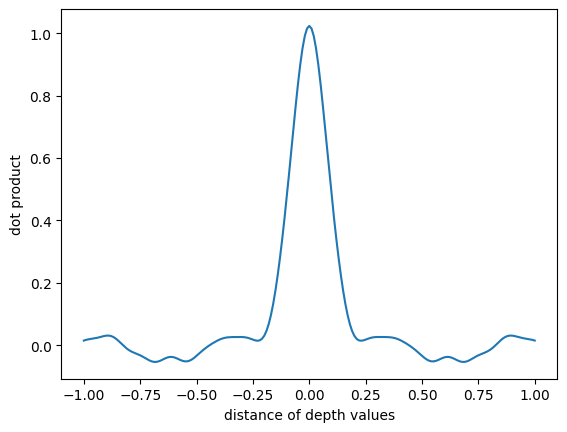

In [42]:
print(basis.shape)
delta = torch.linspace(-1, 1, 201)
delta = delta[:, None]
print(delta.shape)
values = torch.sum(torch.cos(2 * PI * delta * basis), dim=1)
print(values.shape)
plt.plot(delta, values / 500)
plt.xlabel("distance of depth values")
plt.ylabel("dot product")
